## Análise exploratória
Como vimos na aula 01, investigar os dados e entender o comportamento das variáveis pode ser bem útil para entender o problema e escolher uma técnica adequada. Esse processo é comumente chamado de _análise de dados exploratória_, e envolve tanto técnicas quantitativas como técnicas gráficas, plottando distribuições e estatísticas dos dados.
<br>
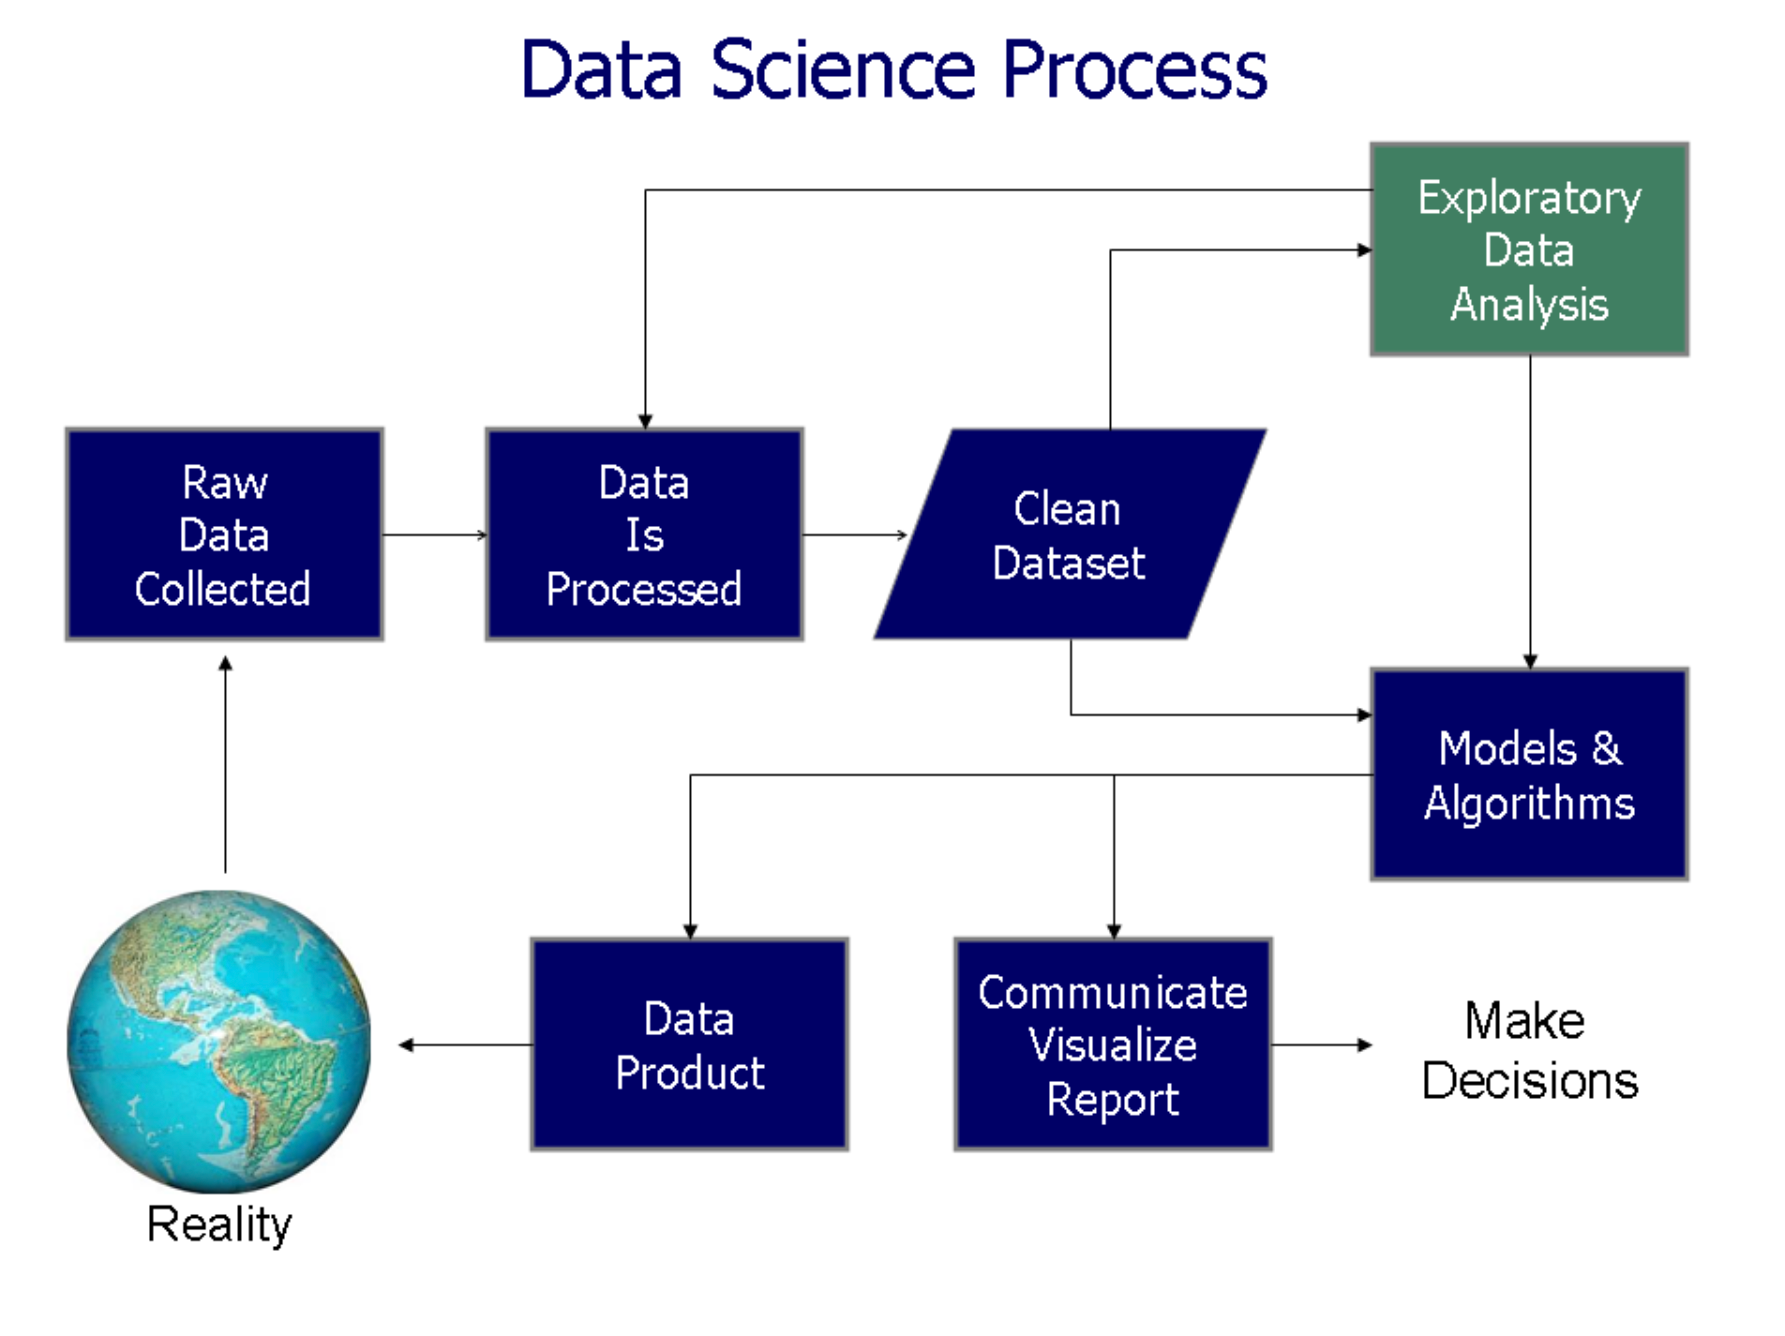
<center><i>Fluxograma típico das etapas de um produto de dados</i></center>
<br>

Para esta aula, utilizaremos a biblioteca _seaborn_ para visualização gráfica e o dataset _Wine Quality_, mantido pela Universidade da Califórnia Irvine, cujo objetivo é prever uma nota (de 0 a 10) para a qualidade de amostras de vinho baseado em propriedades químicas deste.

Esta universidade disponibiliza uma biblioteca python para nossa conveniência na obtenção dos datasets. Podemos instalá-la com o seguinte comando:

In [1]:
# !pip install ucimlrepo

In [2]:
# Instalando seaborn
# !pip install seaborn

In [42]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Carregando o dataset
wine_quality = fetch_ucirepo(id=186)
df = pd.concat([wine_quality.data.features, wine_quality.data.targets], axis=1)

In [43]:
df.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [44]:
df.shape

(6497, 12)

In [6]:
# Verificando quantidade de valores faltantes (nulos ou NaNs)
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# Calculando as médias para termos uma noção da escala dos dados
df.mean()

fixed_acidity             7.215307
volatile_acidity          0.339666
citric_acid               0.318633
residual_sugar            5.443235
chlorides                 0.056034
free_sulfur_dioxide      30.525319
total_sulfur_dioxide    115.744574
density                   0.994697
pH                        3.218501
sulphates                 0.531268
alcohol                  10.491801
quality                   5.818378
dtype: float64

Como os dados estão em escalas muito diferentes, precisaremos normalizá-los ou padronizá-los antes de treinar um modelo.

In [8]:
# O método .describe() do pandas é extremamente conveniente,
# porém pode ser bem custoso em datasets maiores
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

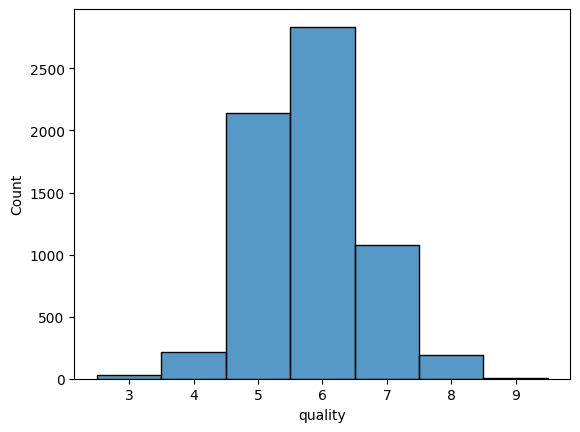

In [45]:
import seaborn as sns
# Distribuição da nota (coluna quality)
sns.histplot(data=df, x='quality', discrete=True)
df['quality'].value_counts().sort_index()

In [46]:
# Verificando se há dados duplicados
df.duplicated().sum()

1179

In [47]:
df.shape

(6497, 12)

In [48]:
# Removendo duplicidades
df.drop_duplicates(inplace=True)

In [49]:
df.shape

(5318, 12)

<Axes: xlabel='fixed_acidity', ylabel='residual_sugar'>

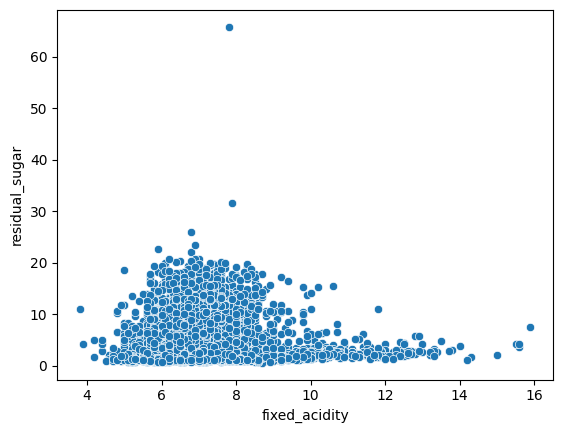

In [50]:
# Plots de dispersão bivariados
sns.scatterplot(df, x='fixed_acidity', y='residual_sugar')

Um método bastante útil para resumir as distribuições é o _pairplot_ do _seaborn_. Este método plotta uma distribuição bivariada para cada par de variáveis, mas é custoso para ser executado:

C:\Users\Danihell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


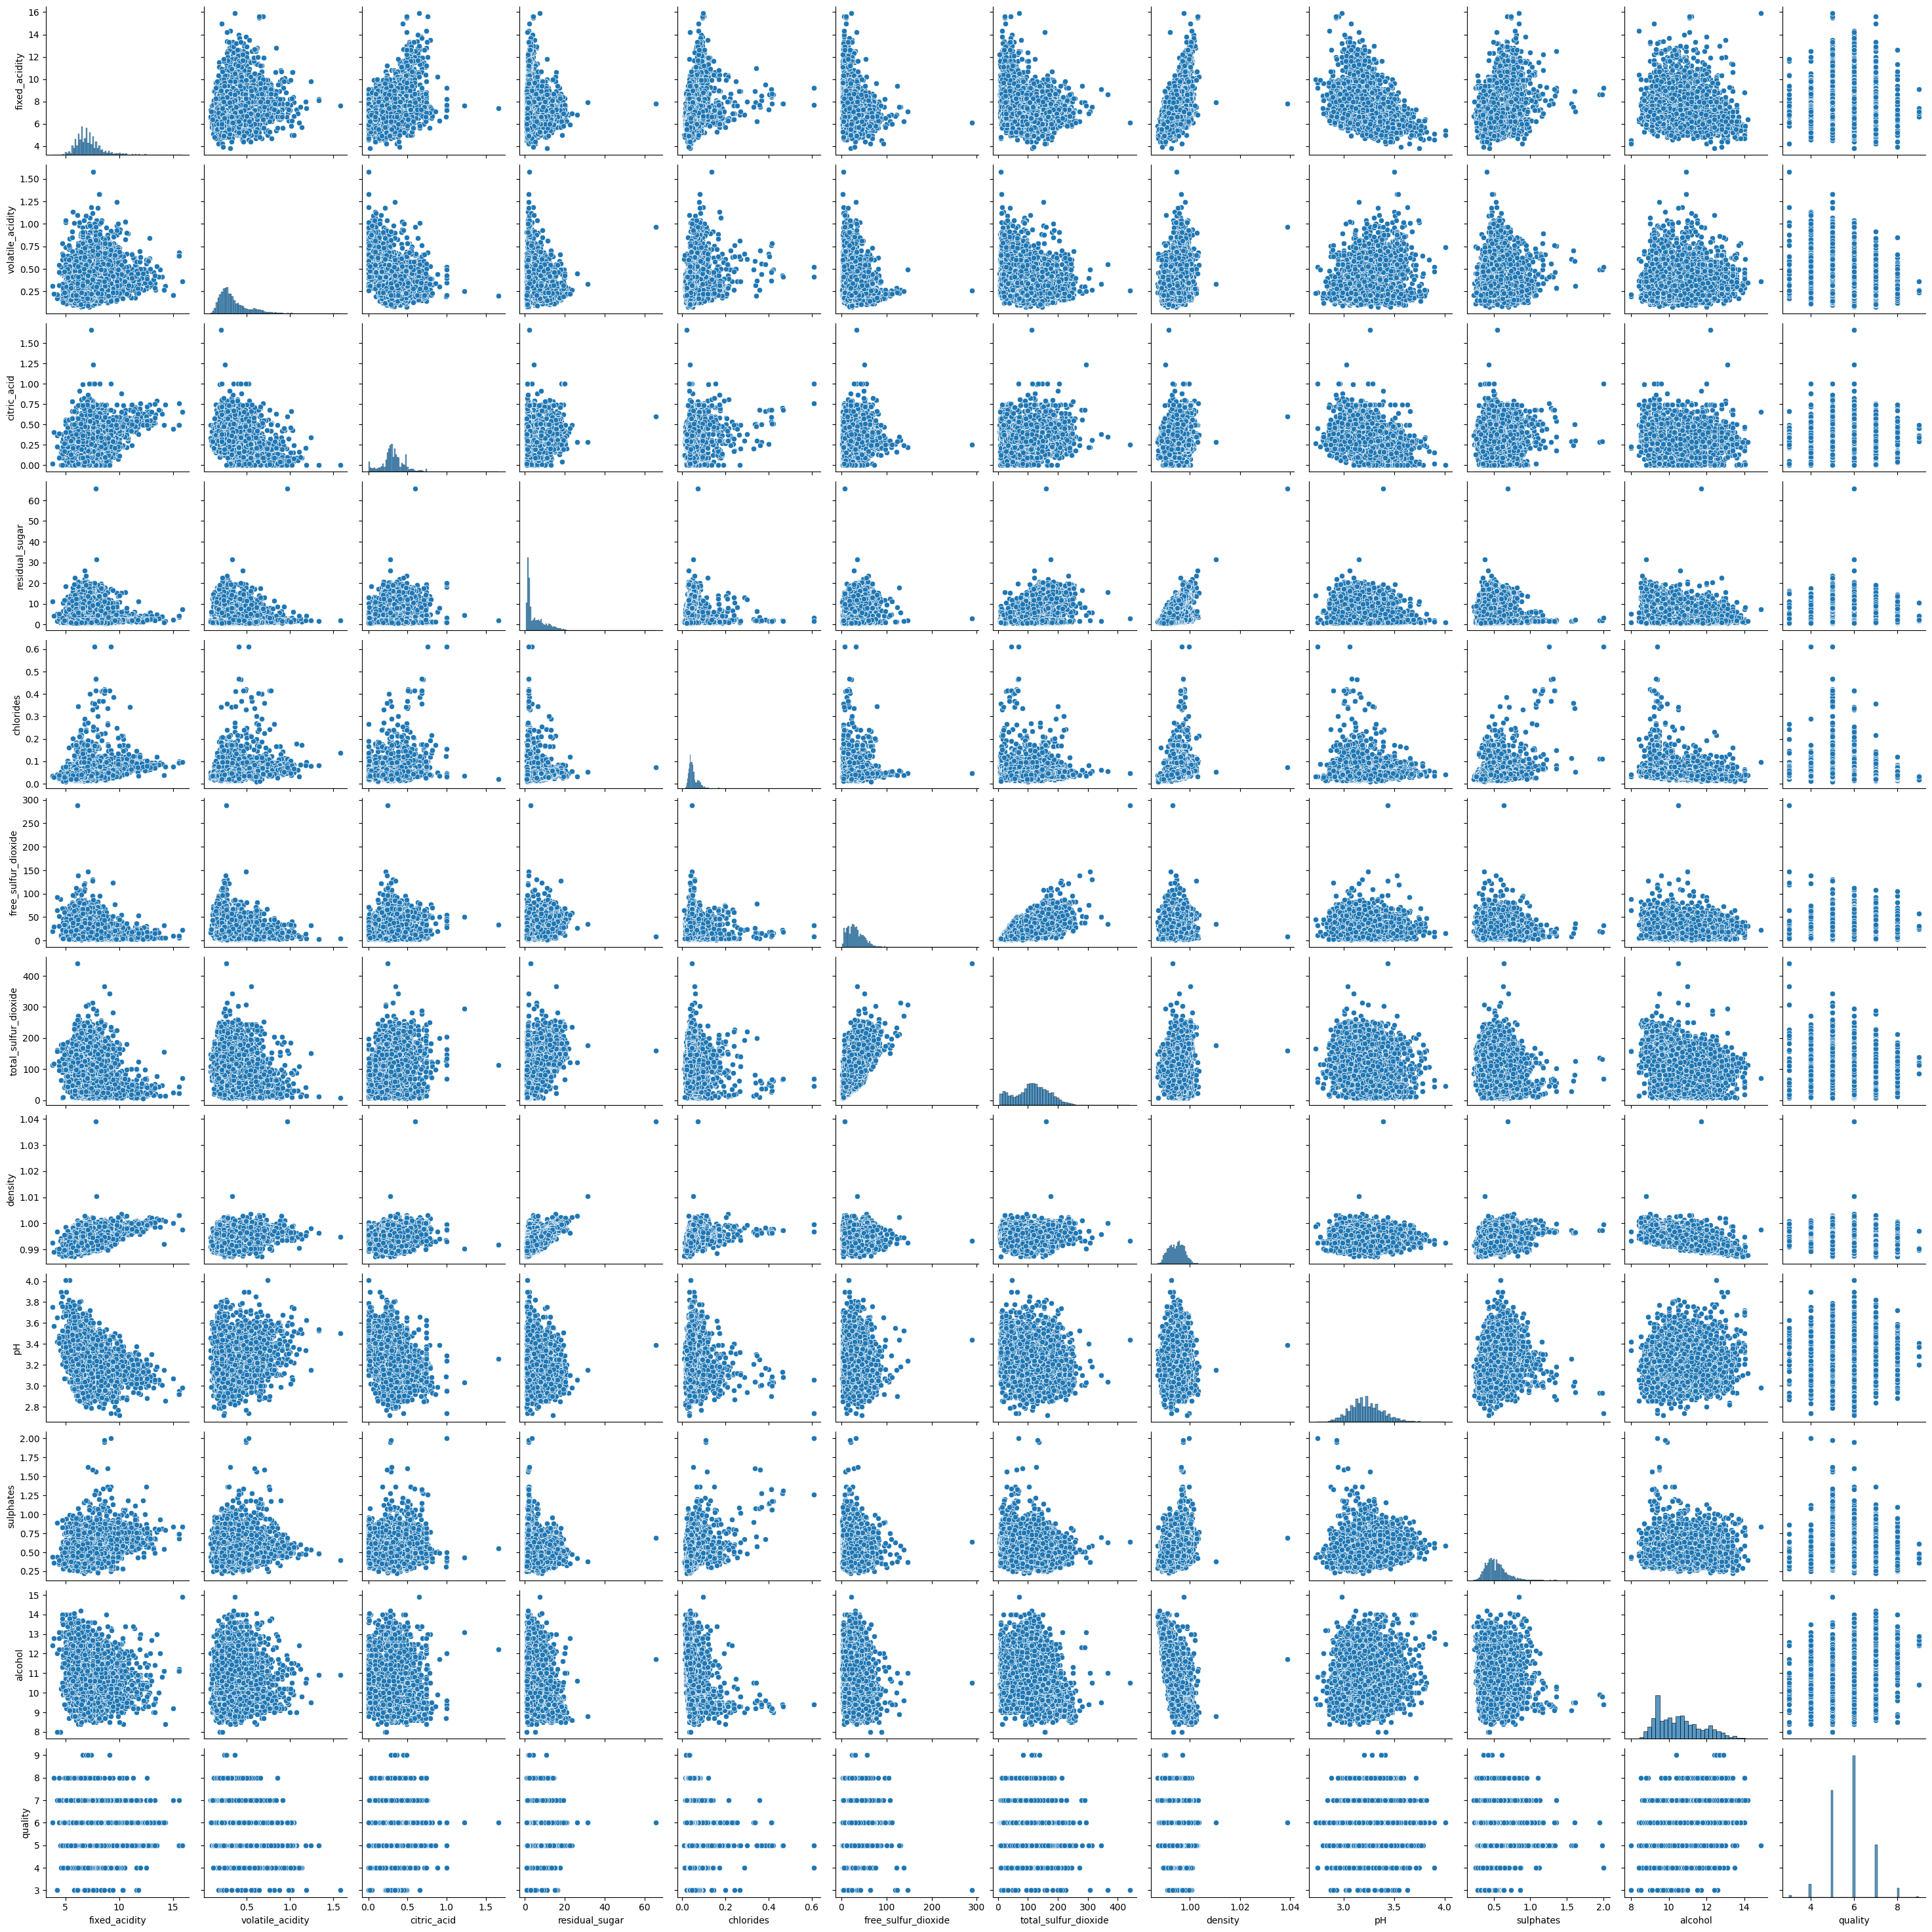

In [15]:
sns.pairplot(df)

Mais informações sobre as possíveis visualizações dos dados podem ser encontradas na documentação oficial da biblioteca _seaborn_ (https://seaborn.pydata.org/).

Uma medida muito importante para a compreensão dos problemas é a **correlação**. Este coeficiente descreve um grau de relação estatística linear entre as variáveis:

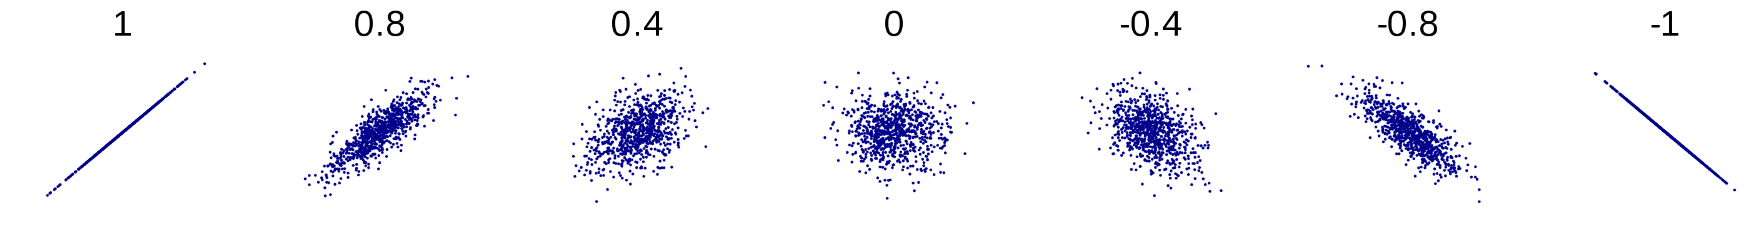

<br>

Sua fórmula pode ser dada por esta equação:

$${\displaystyle r_{xy}\quad {\overset {\underset {\mathrm {def} }{}}{=}}\quad {\frac {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{(n-1)s_{x}s_{y}}}={\frac {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{\sqrt {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})^{2}\sum \limits _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}},}$$

<br>

A biblioteca pandas nos fornece um método para calcular a correlação entre as variáveis. Este método, entretanto, é extremamente custoso em datasets muito grandes (milhões de linhas e dezenas de colunas)!

In [51]:
# Calculando matriz de correlação com o pandas
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.214595,0.330225,-0.104641,0.288843,-0.281375,-0.327462,0.478148,-0.271094,0.304728,-0.102696,-0.080190
volatile_acidity,0.214595,1.000000,-0.384395,-0.163896,0.367573,-0.348865,-0.400715,0.308375,0.246837,0.227645,-0.065510,-0.265354
citric_acid,0.330225,-0.384395,1.000000,0.146078,0.055107,0.131113,0.194888,0.094663,-0.344675,0.059061,-0.005572,0.097926
residual_sugar,-0.104641,-0.163896,0.146078,1.000000,-0.123302,0.399090,0.487593,0.520867,-0.234443,-0.174946,-0.305334,-0.056824
chlorides,0.288843,0.367573,0.055107,-0.123302,1.000000,-0.186518,-0.269896,0.371665,0.025914,0.404905,-0.269516,-0.201960
free_sulfur_dioxide,-0.281375,-0.348865,0.131113,0.399090,-0.186518,1.000000,0.720576,0.006360,-0.141968,-0.198075,-0.169887,0.054199
total_sulfur_dioxide,-0.327462,-0.400715,0.194888,0.487593,-0.269896,0.720576,1.000000,0.006677,-0.223000,-0.275877,-0.248942,-0.050183
density,0.478148,0.308375,0.094663,0.520867,0.371665,0.006360,0.006677,1.000000,0.034377,0.282494,-0.667861,-0.326301
pH,-0.271094,0.246837,-0.344675,-0.234443,0.025914,-0.141968,-0.223000,0.034377,1.000000,0.168287,0.097392,0.039789
sulphates,0.304728,0.227645,0.059061,-0.174946,0.404905,-0.198075,-0.275877,0.282494,0.168287,1.000000,-0.017166,0.042040


Note que a diagonal da matriz de correlação sempre tem o valor 1. Note também que a parte triangular superior da matriz é idêntica à parte inferior. Isso se dá porque a correlação de uma variável com ela mesma é sempre 1, e a correlação $c(x, y)$ de duas variáveis aleatórias contínuas $x$ e $y$ é simétrica i.e. $c(x, y) = c(y, x)$.

Coeficientes de correlação de alta magnitude com a variável resposta _quality_ significam que a variável tem um bom poder preditivo sobre a resposta. Na matriz anterior, a variável _alcohol_ possui a maior correlação com a resposta _quality_.

Entretanto, visualizar a correlação através de números é muito trabalhoso para as finalidades de análise exploratória. Podemos gerar um mapa de calor com o seaborn da seguinte forma:

<Axes: >

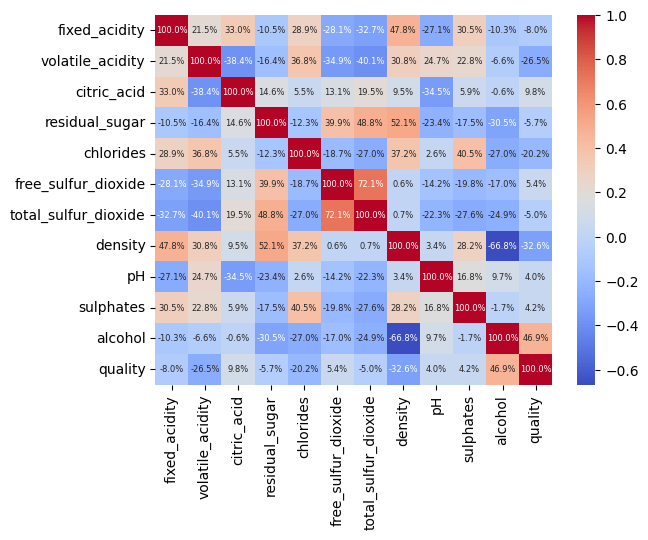

In [17]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.1%', annot_kws={'size':6})

Note a simetria ao longo da diagonal! Temos variáveis com correlação moderada com a target, como _density_ e _volatile_acidity_, além da _alcohol_ que vimos anteriormente. Vamos então tentar ajustar nosso primeiro modelo: a humilde regressão linear!

Mas antes, precisamos tratar nossos dados. Antes de fazermos quaisquer processamentos, é importante separar um conjunto do dataset para servir como conjunto de _teste_, isto é, amostras que o modelo treinado nunca viu, com as quais podemos avaliar seu desempenho. Para esta finalidade, usaremos a função _train_test_split_, da biblioteca _sklearn_:

In [52]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.3, random_state=100)

In [53]:
df_train.shape

(3722, 12)

In [54]:
df_test.shape

(1596, 12)

Essa função nos retornou dois dataframes: o df_train, contendo o conjunto de dados que usaremos para treinar o modelo, e o df_test, com a parte dos dados que usaremos para avaliar seu desempenho. O parâmetro _test_size_ determina a proporção dos dados que será mantida como teste.

A divisão é feita neste caso amostrando o dataset aleatoriamente, mas é importante notar que em problemas com dependência temporal (prever o valor de algo no futuro) é importante separar os conjuntos de treino e teste temporalmente, isto é, treinar com dados do passado e testar em dados do futuro. Por conta disso, precisamos de amostras distribuídas ao longo de um período grande de tempo para esses problemas. Também é comum separar um terceiro dataset para validação após ajustar as técnicas e trocar seus respectivos hiperparâmetros, pois a otimização destes pode induzir um viés específico do conjunto de teste.

Agora que temos nosso conjunto de treino, vamos aplicar o processo de _padronização_. É importante **ajustar/fittar** o objeto StandardScaler() **somente sobre o conjunto de treino**. Calcular a média e o desvio padrão sobre o conjunto total pode "vazar dados" do conjunto de teste para o conjunto de treino. Essa é uma boa prática muito comum de ser esquecida e significa que o desempenho do modelo em aplicação pode ser muito diferente do observado durante o desenvolvimento.

#### Terminologia de variáveis
- Variáveis explicativas (features, variáveis independentes)
- Variáveis resposta (target, variáveis dependentes)
- Variáveis descritivas

As vars explicativas são as que usaremos para estimar a target. A variável resposta é a variável que queremos estimar. As variáveis descritivas não necessariamente entram no modelo (mas podem entrar), mas são utilizadas para caracterizar as predições - por exemplo, podemos não incluir a idade de uma pessoa no modelo, mas estarmos interessados em saber a idade média das amostras com maior score.

In [59]:
df.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [55]:
from sklearn.preprocessing import StandardScaler

# Definindo colunas de treino - variáveis explicativas
model_cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
              'free_sulfur_dioxide', 'topicos.txttal_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']

scaler = StandardScaler()
scaler.fit(df_train[model_cols])

df_train[model_cols] = scaler.transform(df_train[model_cols])

In [56]:
from IPython.display import display
print('Média:')
display(list(zip(scaler.mean_, df.mean())))
print('Desvio padrão:')
display(list(zip(scaler.scale_, df.std())))

Média:


[(7.211593229446535, 7.21552275291463),
 (0.3408006448146158, 0.3441707408800301),
 (0.3190300913487372, 0.31852200075216247),
 (5.10228371843095, 5.049605114704776),
 (0.05638876947877486, 0.05670045129748025),
 (29.954997313272433, 30.030462579917263),
 (114.54339065018807, 114.10774727341105),
 (0.9945586969371306, 0.9945362429484769),
 (3.225660934981193, 3.224638962015795),
 (0.5324959699086512, 0.5334016547574276),
 (10.543443489159593, 10.549222138645167)]

Desvio padrão:


[(1.317961953528344, 1.3197766620171798),
 (0.16615658347066115, 0.16826432147704157),
 (0.14523767197978904, 0.1471765382361195),
 (4.571882901968922, 4.500645454947744),
 (0.03520392900745005, 0.03686480293571841),
 (17.294057367130993, 17.80436475629034),
 (56.56444053415507, 56.78384763993409),
 (0.0029956258851676345, 0.0029655413417004183),
 (0.1603983355099911, 0.160403300727131),
 (0.1493333857041151, 0.14975270447237696),
 (1.1930389589317645, 1.1859636718477184)]

O objeto _scaler_ agora está ajustado com as médias e desvios padrões do dataset de treino. Quando formos executar a inferência sobre o conjunto de teste, precisaremos usar _este mesmo objeto, com este mesmo ajuste_, para escalonar o conjunto.

### Regressão linear
A regressão linear é um dos modelos de machine learning mais simples e tradicionais. Este algoritmo em específico pode ser resolvido "na mão", analiticamente, e é uma técnica extremamente comum na caixa de ferramentas de qualquer área da ciência moderna. Apesar de sua simplicidade e possibilidade de resolução sem máquinas, é um modelo de machine learning quando implementado computacionalmente.

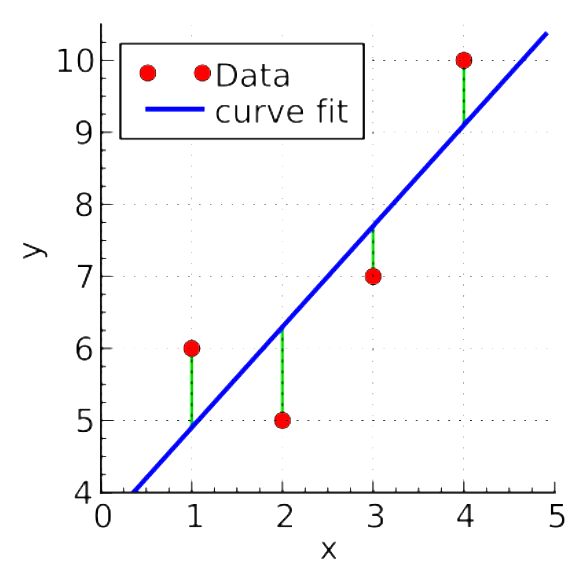
<br>

Com essa técnica, temos como objetivo ajustar um hiperplano no espaço dos dados. Este hiperplano significa, entre outras coisas, que a dependência calculada das variáveis é **linear**, o que pode ser um problema caso isso não seja verdade nos dados:

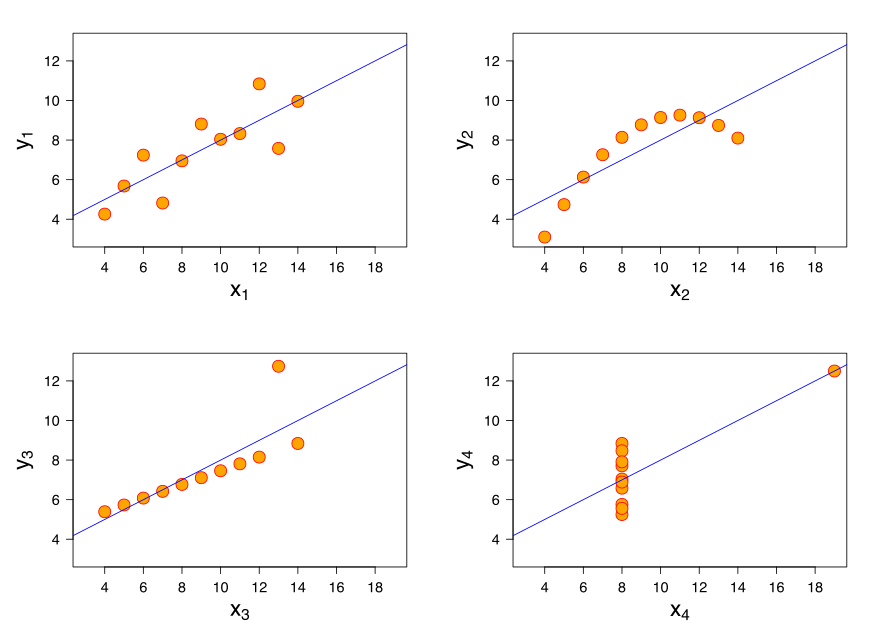
<br>

O canal StatQuest tem um ótimo vídeo explicando visualmente o que acontece na regressão linear: https://www.youtube.com/watch?v=7ArmBVF2dCs (~27 min). A regressão linear com o erro quadrático médio é comumente chamada de _método dos mínimos quadrados_.

##### Heurística
Vamos pensar no caso bidimensional - onde temos somente uma variável explicativa (independente) $x$ e uma variável resposta (dependente) $y$. Uma reta $f(x)$ (a função que estamos estimando) neste caso é dada por

$$\Large
\begin{aligned}
f(x) = ax+b
\end{aligned}$$

onde $a$ e $b$ são os parâmetros livres que devem ser estimados - o **ajuste/fitting** da técnica. Isso significa que podemos "variar" a reta de duas formas: mudando seu coeficiente angular $a$, que representa a inclincação da reta, e seu termo livre $b$, que determina a posição inicial da reta i.e. seu valor no ponto $x=0$.

Para essa finalidade, vamos precisar de uma forma de "medir" o quão "longe" dos dados a reta atual está a fim de ajustá-la. Essa é a _função de custo_ ou _loss_, e no caso da regressão linear, usaremos o _erro quadrático médio_, definido da seguinte forma:

$${\displaystyle \operatorname {MSE} = e(a, b) ={\frac {1}{n}}\sum _{i=1}^{n}\left(Y_{i}-{\hat {Y_{i}}}\right)^{2}}$$

onde $n$ é a quantidade de amostras, $Y_{i}$ é o valor (target) da i-ésima amostra e $\hat{Y_{i}}$ é o valor da reta na i-ésima amostra. Podemos substituir $\hat{Y_{i}}$ pela equação da reta:

$${\LARGE \displaystyle e(a, b) ={\frac {1}{n}}\sum _{i=1}^{n}\left(Y_{i}-{(ax_{i}+b}\right))^{2}}$$

Esta função é diferenciável em todos os pontos, então podemos calcular seu gradiente (derivada) em relação aos coeficientes $a$ e $b$:

$$\Large {\displaystyle \nabla e(a, b) = \begin{bmatrix}
                   \frac{\delta e}{\delta a} \\
                   \frac{\delta e}{\delta b}
                  \end{bmatrix}}$$
                  
Podemos então dar "um passo" na direção contrária deste gradiente - ele representa a direção de **máximo aumento** da função, e esta representa o erro do modelo. Logo, este passo contrário **diminui o erro do modelo**, de forma que podemos recalculá-lo após cada passo e seguir iterando até obtermos a convergência, isto é, atingirmos um mínimo local - um ponto onde todas as direções representam um **aumento** na função.

Curiosidade: no caso da regressão linear, o mínimo local é o global pois o erro quadrático médio forma uma superfície convexa, o que garante que esta só possui um ponto crítico, logo o ponto de mínimo é único e portanto qualquer mínimo local é o mínimo global.

Vamos agora ajustar uma regressão linear usando a implementação LinearRegression() da biblioteca _sklearn_:

In [60]:
from sklearn.linear_model import LinearRegression

# Inicializando o objeto
# Há a opção de não ajustarmos o termo b, isto é, forçar b=0
# através do parâmetro booleano fit_intercept
reg = LinearRegression()

In [61]:
%%time
# A notação de X maiúsculo para vars explicativas e y minúsculo
# para a target vem da álgebra linear: normalmente a letra maiús-
# cula representa uma matriz, e a minúscula um escalar. É uma ló-
# gica comum em todas as implementações de ML do sklearn.
reg.fit(X=df_train[model_cols], y=df_train['quality'])

CPU times: total: 15.6 ms
Wall time: 3 ms


LinearRegression()

O modelo foi ajustado bem rápido! Vamos dar uma olhada nos seus coeficientes:

In [62]:
print('Termo b:', reg.intercept_)
print('Termos a:')
dict(zip(model_cols, reg.coef_))

Termo b: 5.7984954325631355
Termos a:


{'fixed_acidity': 0.08661891446419824,
 'volatile_acidity': -0.19456272104618536,
 'citric_acid': 0.015819297062154764,
 'residual_sugar': 0.1742872634454742,
 'chlorides': -0.0275929002933388,
 'free_sulfur_dioxide': 0.14318242596966918,
 'total_sulfur_dioxide': -0.15742734749783815,
 'density': -0.18485703181635593,
 'pH': 0.09355155169594147,
 'sulphates': 0.12409508472749993,
 'alcohol': 0.311470245543372}

In [64]:
# Note que estamos trabalhando com variáveis padronizadas
# Os coeficientes são multiplicados nas variáveis padronizadas, não nas puras
df_train.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
294,4.619562,-0.004819,1.383731,-0.416083,1.068382,-0.749101,-1.088023,2.283764,-1.095154,1.858285,-0.874610,6
1550,-0.084671,2.041444,-2.196607,-0.612939,0.869540,-0.749101,-1.565354,1.092027,1.398637,-0.016714,-0.874610,5
1900,0.825826,-0.847397,0.213236,-0.919158,-0.181479,-1.038218,-0.716765,-0.854144,-0.596396,-1.021178,-0.036414,6


Como esperávamos devido à correlação, a variável _alcohol_ foi a melhor preditora para a variável resposta _quality_, isto é, seu valor tem a maior influência no valor final da predição. Os coeficientes negativos de _density_ e _total_sulfur_dioxide_ também representam bons preditores pois seus valores em magnitude são altos, e seus sinais negativos representam que a influência é **negativa**, são variáveis que conforme aumentam, diminuem o valor predito.

Vamos agora calcular uma métrica para avaliar a qualidade do ajuste. É importante notar que, por ora, estamos calculando esse valor sobre o conjunto de treino, que o modelo foi ajustado sobre. Podemos utilizar o erro quadrático médio:

In [65]:
preds

array([5.6170586 , 5.02206141, 5.81130223, ..., 5.56356285, 5.44981413,
       6.37784058])

In [66]:
from sklearn.metrics import mean_squared_error

preds = reg.predict(df_train[model_cols])

mse_treino = mean_squared_error(y_true=df_train['quality'], y_pred=preds)
print('MSE no conjunto de treino:', mse_treino)

MSE no conjunto de treino: 0.528680442915645


Estamos errando, em média, 0.53 pontos ao quadrado! Como essa não é uma unidade de medida exatamente interpretável, podemos tomar sua raíz quadrada para termos uma noção melhor do desempenho:

In [71]:
print('RMSE no conjunto de treino:', mse_treino**(1/2))
print('RMSE no conjunto de treino:', mean_squared_error(df_train['quality'], preds, squared=False))

RMSE no conjunto de treino: 0.7271041486029667
RMSE no conjunto de treino: 0.7271041486029667


Então estamos errando, em média 0.72 pontos. Antes de prosseguirmos, vale calcularmos mais uma métrica: o erro percentual absoluto médio. Essa métrica nos diz quantos pontos percentuais estamos errando por amostra em média - isto é, se o valor real é 100 e estamos prevendo 90, o erro percentual desta amostra é 10%. A utilização em código é praticamente idêntica ao MSE:

In [72]:
from sklearn.metrics import mean_absolute_percentage_error

mape_treino = mean_absolute_percentage_error(y_true=df_train['quality'], y_pred=preds)
print('MAPE no conjunto de treino:', mape_treino)

MAPE no conjunto de treino: 0.10111443943012047


Ótimo! Podemos ainda verificar a distribuição das predições contra a real:

<Axes: xlabel='y_pred', ylabel='Count'>

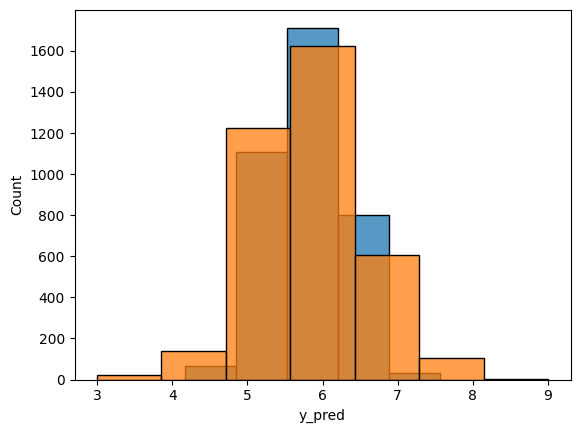

In [73]:
# Atribuindo predições a uma coluna no dataframe
df_train['y_pred'] = preds

sns.histplot(df_train, x='y_pred', bins=5, kde=False)
sns.histplot(df_train, x='quality', bins=7, kde=False)

Como o valor da nota é um número _inteiro_, vamos arredondar nossas predições pro inteiro mais próximo para nos livrarmos de um pouco do erro:

In [74]:
df_train['y_pred_rounded'] = df_train['y_pred'].round()

Vamos recalcular as métricas usando a predição arredondada:

In [75]:
print('MSE no conjunto de treino:', mean_squared_error(y_true=df_train['quality'], y_pred=df_train['y_pred_rounded']))
print('RMSE no conjunto de treino:', mean_squared_error(y_true=df_train['quality'], y_pred=df_train['y_pred_rounded'])**(1/2))
print('MAPE no conjunto de treino:', mean_absolute_percentage_error(y_true=df_train['quality'], y_pred=df_train['y_pred_rounded']))

MSE no conjunto de treino: 0.6329930145083289
RMSE no conjunto de treino: 0.7956085812183834
MAPE no conjunto de treino: 0.09281343022611159


In [30]:
# Printando novamente as métricas sobre o score não-arredondado para comparação
print('MSE no conjunto de treino:', mean_squared_error(y_true=df_train['quality'], y_pred=df_train['y_pred']))
print('RMSE no conjunto de treino:', mean_squared_error(y_true=df_train['quality'], y_pred=df_train['y_pred'])**(1/2))
print('MAPE no conjunto de treino:', mean_absolute_percentage_error(y_true=df_train['quality'], y_pred=df_train['y_pred']))

MSE no conjunto de treino: 0.528680442915645
RMSE no conjunto de treino: 0.7271041486029667
MAPE no conjunto de treino: 0.10111443943012047


In [76]:
# Verificando manualmente algumas predições
df_train.sample(10)[['quality', 'y_pred']]

,quality,y_pred
4885,7,6.171570
3479,5,5.522886
5771,6,5.942950
4604,6,6.132175
4143,6,5.866620
4699,7,6.245769
2233,6,6.205347
1413,5,5.440018
3607,5,5.678588
3991,7,5.605171


In [32]:
# Calculando correlação entre valores reais e preditos
df_train[['quality', 'y_pred']].corr()

,quality,y_pred
quality,1.000000,0.560022
y_pred,0.560022,1.000000


In [33]:
# Calculando correlação entre valores reais e preditos arredondados
df_train[['quality', 'y_pred_rounded']].corr()

,quality,y_pred_rounded
quality,1.000000,0.466111
y_pred_rounded,0.466111,1.000000


Outra métrica muito útil para regressão é o $R^{2}$. Muito parecido com a correlação, um jeito de interpretar essa métrica é como o percentual da variância da variável resposta que o modelo está capturando. Quanto mais alto, melhor.

In [34]:
from sklearn.metrics import r2_score
print('R² conjunto de treino:', r2_score(df_train['quality'], df_train['y_pred']))
print('R² conjunto de treino (arredondado):', r2_score(df_train['quality'], df_train['y_pred_rounded']))

R² conjunto de treino: 0.31362512848922697
R² conjunto de treino (arredondado): 0.1781982768186221


Por mais que seja uma operação intuitiva, arredondar a predição do modelo não necessariamente significará um aumento de desempenho, como vimos nitidamente na métrica $R^{2}$.

##### Conjunto de teste
Agora que temos nosso modelo devidamente treinado e temos uma noção do seu desempenho no conjunto de treino, precisamos executar a inferência, isto é, as previsões do modelo, para o conjunto de teste. O desempenho no conjunto de treino pode ser altamente enviesado, principalmente ao usar técnicas mais flexíveis, de alta variância; portanto o número "correto" da métrica, que representa o desempenho real do modelo, é o calculado no conjunto de teste.

É importante notar que precisamos usar os scalers **ajustados sobre o conjunto de treino**.

In [77]:
df_test.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
2141,5.5,0.350,0.35,1.1,0.045,14.0,167.0,0.99200,3.34,0.68,9.9,6
6078,6.0,0.555,0.26,4.5,0.053,17.0,126.0,0.99430,3.24,0.46,9.1,5
3417,6.0,0.260,0.29,1.0,0.032,27.0,96.0,0.98960,3.38,0.44,12.3,6
1152,8.3,0.600,0.25,2.2,0.118,9.0,38.0,0.99616,3.15,0.53,9.8,5
4345,7.0,0.340,0.30,1.8,0.045,44.0,142.0,0.99140,2.99,0.45,10.8,6


In [78]:
# Aplicando scaler
df_test[model_cols] = scaler.transform(df_test[model_cols])

# Executando inferência
df_test['y_pred'] = reg.predict(df_test[model_cols])

# Calculando métricas
print('MSE no conjunto de teste:', mean_squared_error(y_true=df_test['quality'], y_pred=df_test['y_pred']))
print('RMSE no conjunto de teste:', mean_squared_error(y_true=df_test['quality'], y_pred=df_test['y_pred'])**(1/2))
print('MAPE no conjunto de teste:', mean_absolute_percentage_error(y_true=df_test['quality'], y_pred=df_test['y_pred']))
print('R² conjunto de teste:', r2_score(df_test['quality'], df_test['y_pred']))

MSE no conjunto de teste: 0.5539285985880308
RMSE no conjunto de teste: 0.7442637963706356
MAPE no conjunto de teste: 0.10283574545198224
R² conjunto de teste: 0.29152055093582185


In [79]:
# Printando novamente as métricas sobre o score não-arredondado para comparação
print('MSE no conjunto de treino:', mean_squared_error(y_true=df_train['quality'], y_pred=df_train['y_pred']))
print('RMSE no conjunto de treino:', mean_squared_error(y_true=df_train['quality'], y_pred=df_train['y_pred'])**(1/2))
print('MAPE no conjunto de treino:', mean_absolute_percentage_error(y_true=df_train['quality'], y_pred=df_train['y_pred']))
print('R² conjunto de teste:', r2_score(df_train['quality'], df_train['y_pred']))

MSE no conjunto de treino: 0.528680442915645
RMSE no conjunto de treino: 0.7271041486029667
MAPE no conjunto de treino: 0.10111443943012047
R² conjunto de teste: 0.31362512848922697


Calculando diferença de desempenho entre treino e teste:

In [80]:
# Calculando métricas
dif_mse = mean_squared_error(y_true=df_test['quality'], y_pred=df_test['y_pred']) - mean_squared_error(y_true=df_train['quality'], y_pred=df_train['y_pred'])
dif_rmse = mean_squared_error(y_true=df_test['quality'], y_pred=df_test['y_pred'])**(1/2) - mean_squared_error(y_true=df_train['quality'], y_pred=df_train['y_pred'])**(1/2)
dif_mape = mean_absolute_percentage_error(y_true=df_test['quality'], y_pred=df_test['y_pred']) - mean_absolute_percentage_error(y_true=df_train['quality'], y_pred=df_train['y_pred'])
dif_r2 = r2_score(df_test['quality'], df_test['y_pred']) - r2_score(df_train['quality'], df_train['y_pred'])
print('Diferença MSE:', dif_mse)
print('Diferença RMSE:', dif_rmse)
print('Diferença MAPE:', dif_mape)
print('Diferença R²:', dif_r2)

Diferença MSE: 0.025248155672385808
Diferença RMSE: 0.017159647767668873
Diferença MAPE: 0.0017213060218617682
Diferença R²: -0.022104577553405114


Note que, por todas as métricas, o desempenho no conjunto de teste foi pior. As métricas MSE, RMSE e MAPE representam um _erro_, portanto quanto menor, melhor. No caso do $R^{2}$, quanto maior melhor - logo tivemos desempenho inferior em todas as métricas.

#### Spoiler das próximas aulas
Vamos utilizar uma técnica capaz de capturar não-linearidades no dataset chamada Random Forest. Exploraremos em detalhe esta técnica e seus respectivos hiperparâmetros na aula de árvores de decisão, mas por ora vamos somente importar, treinar e avaliar o estimador com os hiperparâmetros default para podermos comparar com a regressão linear.

In [81]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(df_train[model_cols], df_train['quality'])
df_train['y_pred_rfr'] = rfr.predict(df_train[model_cols])
df_test['y_pred_rfr'] = rfr.predict(df_test[model_cols])
print('R² no conjunto de treino:', r2_score(df_train['quality'], df_train['y_pred_rfr']))
print('R² no conjunto de teste:', r2_score(df_test['quality'], df_test['y_pred_rfr']))

R² no conjunto de treino: 0.9138599363141132
R² no conjunto de teste: 0.3435111638895235


In [82]:
dif_mse = mean_squared_error(y_true=df_test['quality'], y_pred=df_test['y_pred_rfr']) - mean_squared_error(y_true=df_train['quality'], y_pred=df_train['y_pred_rfr'])
dif_rmse = mean_squared_error(y_true=df_test['quality'], y_pred=df_test['y_pred_rfr'])**(1/2) - mean_squared_error(y_true=df_train['quality'], y_pred=df_train['y_pred_rfr'])**(1/2)
dif_mape = mean_absolute_percentage_error(y_true=df_test['quality'], y_pred=df_test['y_pred_rfr']) - mean_absolute_percentage_error(y_true=df_train['quality'], y_pred=df_train['y_pred_rfr'])
dif_r2 = r2_score(df_test['quality'], df_test['y_pred_rfr']) - r2_score(df_train['quality'], df_train['y_pred_rfr'])
print('Diferença MSE:', dif_mse)
print('Diferença RMSE:', dif_rmse)
print('Diferença MAPE:', dif_mape)
print('Diferença R²:', dif_r2)

Diferença MSE: 0.4469300397016183
Diferença RMSE: 0.45885144676937467
Diferença MAPE: 0.06306405739107454
Diferença R²: -0.5703487724245897


Note que conseguimos um modelo com um desempenho consideravelmente melhor! Em contrapartida, a diferença de desempenho entre o conjunto de treino e o de teste é muito grande - isso significa que nosso modelo está _overfittado_, ou sobreajustado. O algoritmo "decorou" padrões nos dados de treino que não são relevantes estatisticamente no contexto geral, apenas na amostra selecionada para treino, e que consequentemente não podem ser generalizados para o conjunto de teste. De forma geral, o _overfitting_ é problemático para os modelos de ML, pois esse fenômeno faz as predições ficarem mais "caóticas" - diferenças pequenas nas variáveis explicativas podem acarretar em uma diferença grande na predição. Ocasionalmente, a depender da aplicação, essa alta variância não é um problema.

Existem arcabouços teóricos que nos munem com ferramentas para lidar com o _overfitting_, rotineiramente chamadas de _regularização_. Cada técnica necessita de regularizações de formas diferentes. No caso da regressão linear, a regularização pode ser feita adicionando um termo na função de custo que depende da diferença dos coeficientes estimados, de forma que se o "peso" ficar concentrado sobre uma única variável, o termo de regularização tem um valor muito alto. Não necessitaremos regularizar esta regressão linear em específico, mas mais detalhes sobre as implementações (L1, L2 e ElasticNet) podem ser encontrados na documentação do _sklearn_:
- Lasso (L1): https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
- Ridge (L2): https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
- ElasticNet: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

Devido à baixa complexidade da regressão linear, a implementação da regularização no _sklearn_ é feita através de outros estimadores, que devem ser importados e ajustados da mesma forma que o objeto LinearRegression(). Em outras técnicas, como na Random Forest, é regularização é feita pelos hiperparâmetros do modelo.

## Exercícios

##### Exercício 1
Utilizando as técnicas de análise exploratória e engenharia de variáveis, crie novas _features_ para o modelo e ajuste novamente a regressão linear. Compare as métricas obtidas nos conjuntos de treino e teste com as obtidas anteriormente. Lembre-se de construir as variáveis novas antes de ajustar o StandardScaler() sobre os dados, e que o desempenho _real_ do modelo deve ser mensurado pelas métricas no conjunto de teste.

##### Exercício 2
Treine uma regressão linear regularizada pela técnica ElasticNet com os hiperparâmetros padrão. Compare o desempenho e os coeficientes obtidos com a regressão linear não regularizada. O link para a documentação desta técnica encontra-se na célula acima.

##### Desafio
Implemente o algoritmo de descida de gradiente para a regressão linear e ajuste um modelo sem utilizar a classe LinearRegression() do _sklearn_. Compare o desempenho de sua implementação com a implementação da biblioteca.
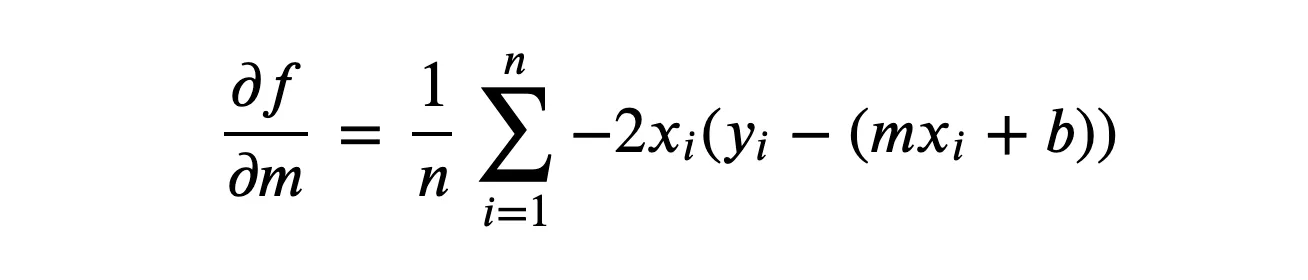
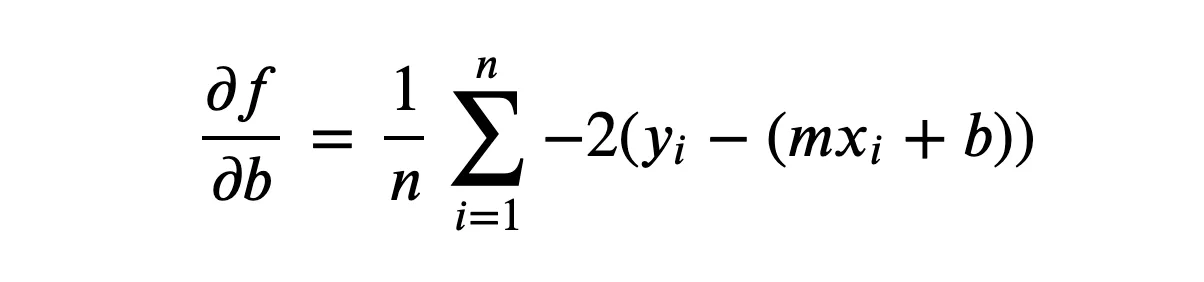
<center>https://towardsdatascience.com/gradient-descent-from-scratch-e8b75fa986cc</center>